# Film Recommendation with Naive Bayes

In [1]:
import numpy as np
from collections import defaultdict
data_path ='ratings.csv'
n_users = 610
n_movies = 9724

### Load Data
* The data set include 610 users and 9724 movies
* Load data set, transform data from long data into wide data. 
* Create a list called movie_n_rating to count the number of rating of each movie
* Crate a list called movie_id_mapping to store the location of movie_id in data table

In [3]:
def load_rating_data(data_path, n_users, n_movies):
    data = np.zeros([n_users, n_movies], dtype=np.float32)
    movie_id_mapping ={}
    movie_n_rating = defaultdict(int)
    with open(data_path, 'r') as file:
        for line in file.readlines()[1:]:
            user_id, movie_id, rating, _ = line.split(",")
            user_id = int(user_id) - 1
            if movie_id not in movie_id_mapping:
                movie_id_mapping[movie_id] = len(movie_id_mapping)
            rating = float(rating)
            data[user_id, movie_id_mapping[movie_id]] = rating
            if rating > 0:
                movie_n_rating[movie_id] += 1
    return data, movie_n_rating, movie_id_mapping

data, movie_n_rating, movie_id_mapping = load_rating_data(data_path, n_users, n_movies)

In [4]:
def display_distribution(data):
    values, counts = np.unique(data, return_counts=True)
    for value, count in zip(values, counts):
        print(f'Number of rating {float(value)}: {count}')

display_distribution(data)

Number of rating 0.0: 5830804
Number of rating 0.5: 1370
Number of rating 1.0: 2811
Number of rating 1.5: 1791
Number of rating 2.0: 7551
Number of rating 2.5: 5550
Number of rating 3.0: 20047
Number of rating 3.5: 13136
Number of rating 4.0: 26818
Number of rating 4.5: 8551
Number of rating 5.0: 13211


* Rating 0 means that the user does provide rates for that movies
* 26.6% are of rataing 4, follow by 19% of rating 3, then 13% are of rating 5 and 3.5.
* rating 0.5, 1, 1.5, 2, 2.5, and 4.5 count for 1.3%, 2.8%, 1.8%, 7.5%, 5.5%, and 8.5% respectively. 

### ---------------------------------------------------------------------------------------------------
* we will take the movie with most ratings as the target movie (outcome)

In [5]:
movie_id_most, n_rating_most = sorted(movie_n_rating.items(),key = lambda d: d[1],reverse = True)[0]
print(f'Movie ID {movie_id_most} has {n_rating_most} ratings')

Movie ID 356 has 329 ratings


* The ratings of the rest movies of users are predictors.
* We will construct the input dataset by removing variable movie_id 356 out of the data

In [6]:
X_raw = np.delete(data, movie_id_mapping[movie_id_most], axis =1)
Y_raw = data[:, movie_id_mapping[movie_id_most]]

* We will remove users who did not rate movie_id 356.

In [7]:
X = X_raw[Y_raw >0]
Y = Y_raw[Y_raw >0]
print(f'Shape of X: ', X.shape)
print(f'shape of Y: ', Y.shape)

Shape of X:  (329, 9723)
shape of Y:  (329,)


* Looking at the distribution of the outcome (target movie ratings):

In [8]:
display_distribution(Y)

Number of rating 0.5: 1
Number of rating 1.0: 1
Number of rating 2.0: 9
Number of rating 2.5: 3
Number of rating 3.0: 39
Number of rating 3.5: 27
Number of rating 4.0: 94
Number of rating 4.5: 39
Number of rating 5.0: 116


* We can consider movies with rating greater than 3 as being liked (being recommended)

In [9]:
recommmend = 3
Y[Y <= recommmend] = 0
Y[Y > recommmend] =1
n_pos = (Y ==1).sum()
n_neg = (Y ==0).sum()
print(f'{n_pos} positive records and {n_neg} negative records')

276 positive records and 53 negative records


### ------------------------------------------------------------------------------------------------------------

 ### Partition Data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 9)
print(len(Y_train),len(Y_test))

230 99


### ------------------------------------------------------------------------------------------------------------

### Naive Bayes Model

In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior= True)
clf.fit(X_train, Y_train)

MultinomialNB()

* Fit the model with the test data, we will get the predicted probability:

In [12]:
predicted_prob = clf.predict_proba(X_test)
print(predicted_prob[0:20])

[[1.00698857e-148 1.00000000e+000]
 [8.03504640e-074 1.00000000e+000]
 [9.40973293e-011 1.00000000e+000]
 [5.27602498e-049 1.00000000e+000]
 [1.52194739e-073 1.00000000e+000]
 [3.73499840e-082 1.00000000e+000]
 [2.56242560e-043 1.00000000e+000]
 [2.48518264e-066 1.00000000e+000]
 [1.14094459e-144 1.00000000e+000]
 [1.74647128e-059 1.00000000e+000]
 [6.83493162e-039 1.00000000e+000]
 [1.00000000e+000 2.08371258e-218]
 [7.26024393e-075 1.00000000e+000]
 [4.93476865e-089 1.00000000e+000]
 [4.48059266e-009 9.99999996e-001]
 [7.18715348e-035 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.23414322e-054 1.00000000e+000]
 [1.50872607e-045 1.00000000e+000]
 [1.94861921e-071 1.00000000e+000]]


* Predicted calss

In [13]:
prediction = clf.predict(X_test)
print(prediction[0:20])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


* Accuracy

In [14]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100: .1f}%')

The accuracy is:  81.8%


### ------------------------------------------------------------------------------------------------------------

### Model Evaluation

* Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction, labels= [0,1]))

[[ 3 15]
 [ 3 78]]


* Precision, Recall, f1

In [18]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      0.17      0.25        18
         1.0       0.84      0.96      0.90        81

    accuracy                           0.82        99
   macro avg       0.67      0.56      0.57        99
weighted avg       0.78      0.82      0.78        99



* ROC Curve

In [37]:
pos_prob = predicted_prob[:,1]
thresholds = np.arange(0.0,1.1,0.05)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y==1:
                true_pos[i] +=1
            else:
                false_pos[i] +=1
        else:
            break

In [38]:
n_pos_test = (Y_test == 1).sum()
n_neg_test = (Y_test == 0).sum()
true_pos_rate = [tp / n_pos_test for tp in true_pos]
false_pos_rate = [fp / n_neg_test for fp in false_pos]

No handles with labels found to put in legend.


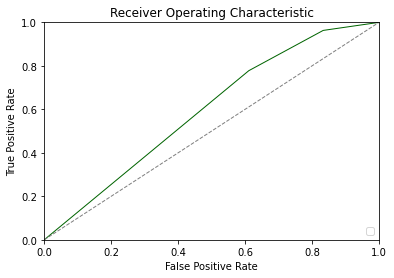

In [40]:
import matplotlib.pyplot as plt
plt.figure()
lw = 1
plt.plot(false_pos_rate, true_pos_rate, color ='darkgreen', lw = lw)
plt.plot([0,1],[0,1], color = 'grey', lw = lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.5953360768175583

### --------------------------------------------------------------------
### Turn models with cross-validation

In [48]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits= k, shuffle= True)
smoothing_factor_option =[1,2,3,4,5,6]
fit_prior_option =[True, False]
auc_record ={}

In [49]:
for train_indices, test_indices in k_fold.split(X, Y):
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        for fit_prior in fit_prior_option:
            clf = MultinomialNB(alpha=alpha,fit_prior=fit_prior)
            clf.fit(X_train, Y_train)
            prediction_prob = clf.predict_proba(X_test)
            pos_prob = prediction_prob[:, 1]
            auc = roc_auc_score(Y_test, pos_prob)
            auc_record[alpha][fit_prior] = auc + auc_record[alpha].get(fit_prior, 0.0)

In [50]:
for smoothing, smoothing_record in auc_record.items():
    for fit_prior, auc in smoothing_record.items():
        print(f' {smoothing} {fit_prior}  {auc/k:.5f}')

 1 True  0.60707
 1 False  0.60353
 2 True  0.60149
 2 False  0.60149
 3 True  0.57979
 3 False  0.58759
 4 True  0.56407
 4 False  0.57178
 5 True  0.56585
 5 False  0.56585
 6 True  0.56723
 6 False  0.56569


In [52]:
clf = MultinomialNB(alpha=2.0, fit_prior=False)
clf.fit(X_train, Y_train)
pos_prob = clf.predict_proba(X_test)[:, 1]
print('AUC with the best model:', roc_auc_score(Y_test,pos_prob))

AUC with the best model: 0.5629629629629629
